In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# Splitting the dataset to train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [5]:
tree_clf = DecisionTreeClassifier()
model = tree_clf.fit(X,y)
#predict the response : 
y_predict = tree_clf.predict(X_test)
y_predict

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [6]:
#Evaluate Accuracy
model_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy' , model_accuracy)

Accuracy 1.0


In [7]:
#See what confusion Matrix look like

cm = confusion_matrix(y_test,y_predict)
cm

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 18]], dtype=int64)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

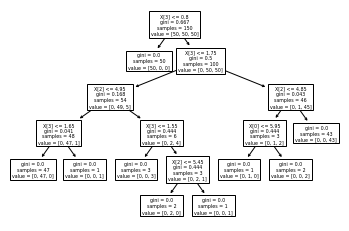

In [8]:
#Draw the tree decision in a small scale
tree.plot_tree(tree_clf)

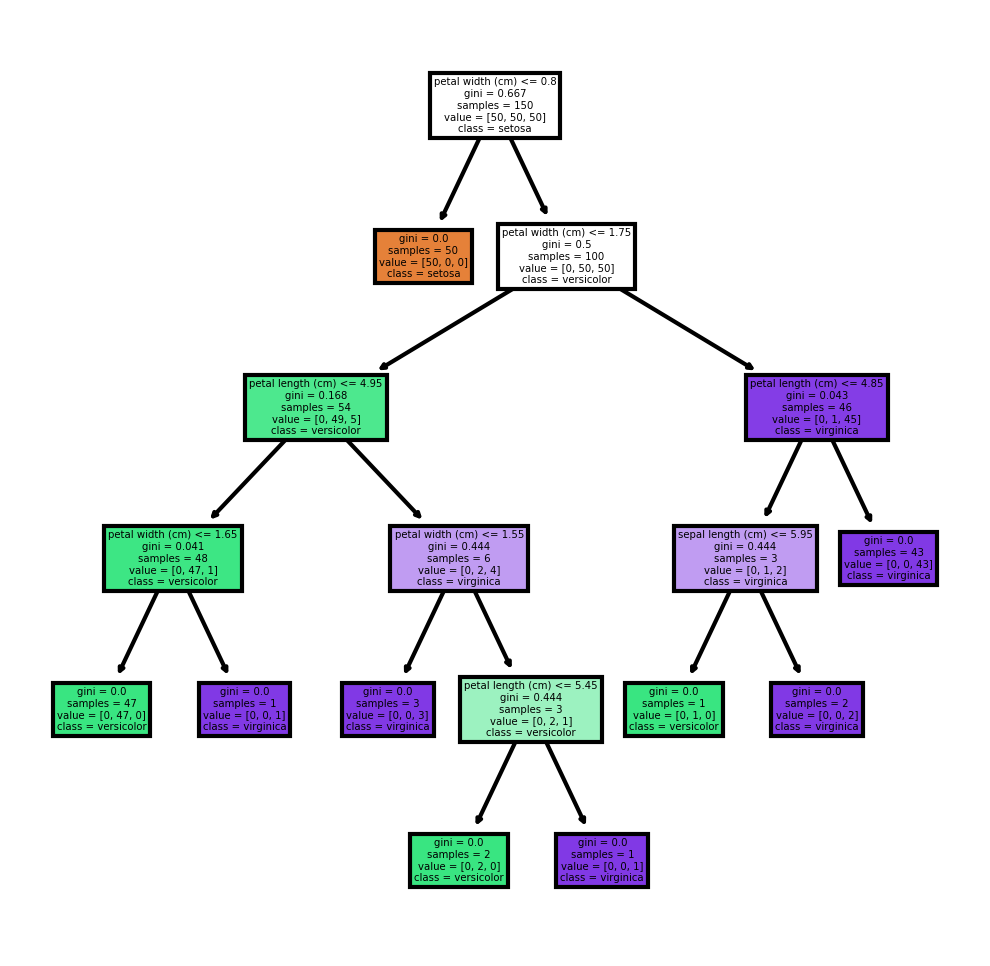

In [10]:
#Draw the tree decision in a big scale with more clarity

feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_clf,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
fig.savefig('iris_data.png')

In [ ]:
#We can visualize with graphviz on a pdf with graph.render('filename') that will create a pdf doc in the folder 

dot_data = export_graphviz(tree_clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('iris_data')